In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.signal import butter, lfilter, freqz, detrend
from scipy.optimize import curve_fit
from sklearn import linear_model
from scipy import stats

In [3]:
sns.set()
sns.set_style('ticks')
sns.set_context('notebook')

# Reading data

In [4]:
df = pd.read_csv('/home/julia/projects/calcium_bold/calcium_data/20190503_1507_0.5.csv')

In [5]:
df.head()

,timepoint[ms],signal[V]
0,0.0,2.755957
1,1.0,2.775030
2,2.0,2.818437
3,3.0,2.772070
4,4.0,2.825343


In [6]:
data = df['signal[V]']
timepoints = df['timepoint[ms]']

# Sliding window

In [7]:
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [8]:
window = 10
binned_data = np.mean(rolling_window(data, window), -1)

In [11]:
tstart = 56000
tend = 66000

<IPython.core.display.Javascript object>


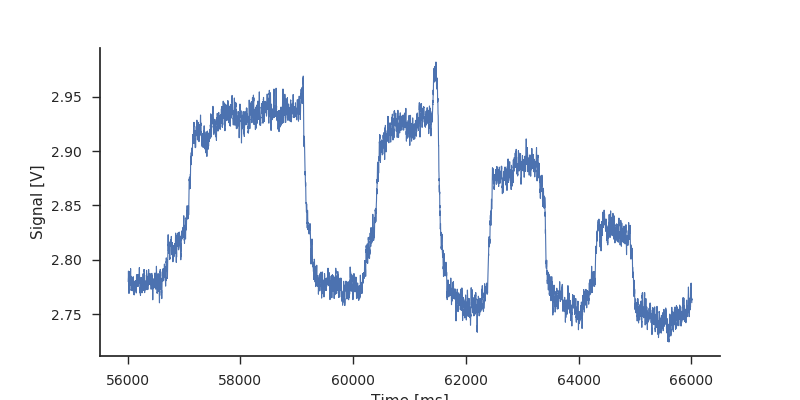

In [12]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel("Time [ms]")
ax1.set_ylabel("Signal [V]")
ax1.plot(timepoints[window-1:][tstart:tend], binned_data[tstart:tend], linewidth=0.8)
sns.despine()

# Calculate intensity increase

In [50]:
on_borders = [[56988,59153], [60217,61512], [62399,63356], [64191,64936]]
off_borders = [[tstart, 56988], [59153, 60217],[61512, 62399], [63356, 64191]] 
on_periods = binned_data[np.r_[56988:59153, 60217:61512, 62399:63356, 64191:64936]]
off_periods = np.ma.array(binned_data, mask=False)
off_periods.mask[np.r_[56988:59153, 60217:61512, 62399:63356, 64191:64936]] = True
off_periods = off_periods[tstart:tend].compressed()

<IPython.core.display.Javascript object>


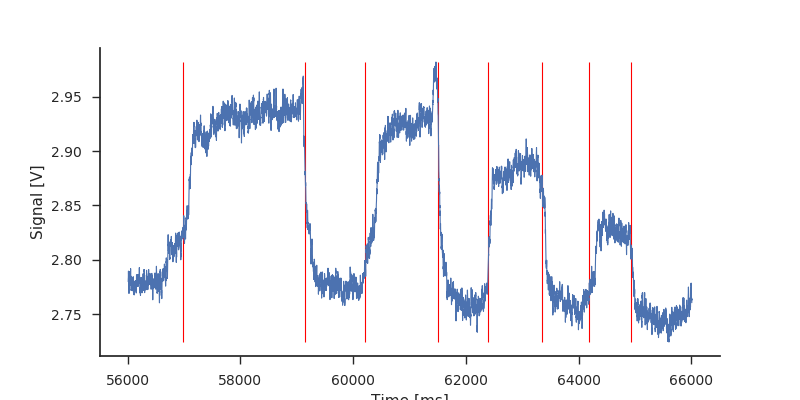

In [48]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel("Time [ms]")
ax1.set_ylabel("Signal [V]")
ax1.plot(timepoints[window-1:][tstart:tend], binned_data[tstart:tend], linewidth=0.8)
plt.vlines(on_borders, binned_data[tstart:tend].min(), binned_data[tstart:tend].max(), linewidth=0.8, color='red')
sns.despine()

In [67]:
intensities = []
perc_increase = []
sdv_increase = []
for o in range(len(on_borders)):
    f = binned_data[off_borders[o][0]:off_borders[o][1]].mean()
    delta_f = binned_data[on_borders[o][0]:on_borders[o][1]].mean() - f
    sdv = binned_data[off_borders[o][0]:off_borders[o][1]].std()
    
    intensities.append(delta_f / f)
    perc_increase.append(np.round(delta_f / f * 100, 2))
    sdv_increase.append(np.round((delta_f / f) / sdv, 2))

In [68]:
print(perc_increase)
print(sdv_increase)

[4.83, 4.51, 3.89, 1.84]
[2.86, 2.56, 1.7, 0.78]
